Практикум №5<br>
Дисципліна: Обробка та аналіз БМД<br>
Студент: Збаровський Дмитро<br>
Група: БС-81

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.
2. Побудувати графік, що відображає розподіл ознак в групах.
3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.
Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.
4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

Ознака  | Група 1 | Група 2  | 
------------- | ------------- |--------- |
Градація ознаки 1  | $n_{11}  $   | $n_{21}$   |
Градація ознаки 2  | $n_{12}$   | $n_{22}$   |
Градація ознаки 3  | $n_{13}$   | $n_{23}$   |

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.
Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [8]:
data = pd.read_csv('character-predictions.csv')
data

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [63]:
cultures = ["Rivermen", "Dornish", "Westeros"]
cultures_tmp = [cultures[i] for i in range(len(cultures))]
table = pd.DataFrame(columns = ["Cultures","Popular", "Not popular"])
table["Cultures"] = cultures_tmp

for i in range(3):
    count1 = 0
    count2 = 0
    
    for j in range(len(data)):
        if (data['culture'][j] == cultures[i]):
            count2 += 1
            if(data["isPopular"][j] == 1):
                count1 += 1
                
    table["Popular"][i] = count1
    table["Not popular"][i] = count2 - count1
    
table

,Cultures,Popular,Not popular
0,Rivermen,4,15
1,Dornish,1,24
2,Westeros,4,8


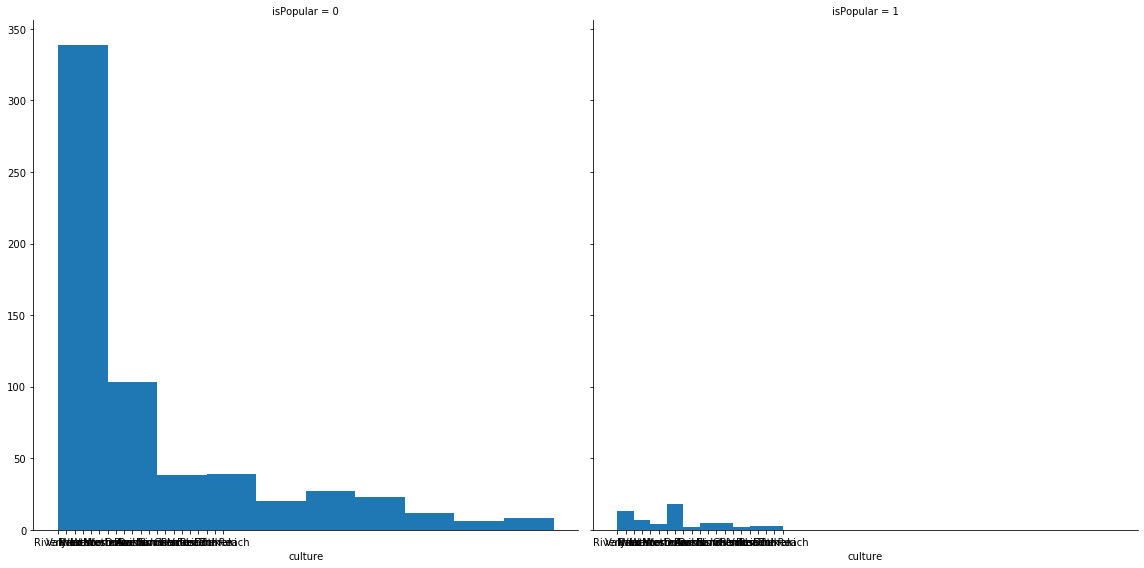

In [54]:
g = sns.FacetGrid(data, col="isPopular", height=8)
g = g.map(plt.hist, "culture")

In [61]:
def Pirson(data, sig_lvl):
    keys = data.keys()
    hi2 = 0
    suma = sum(data[keys[1]])
    
    if sum(data[keys[1]]) != sum(data[keys[2]]):
        for i in range(len(data)):
            data[keys[1]][i] = (data[keys[1]][i]/suma) * sum(data[keys[2]])
    
    for i in range(len(data)):
        subtraction = ((data[keys[1]][i] - data[keys[2]][i])**2)/data[keys[2]][i]
        hi2 += subtraction
    
    r = len(data) - 1
    hi2_table = pd.read_excel('Pirson.xlsx').iloc[r, 1 if sig_lvl == 0.01 else 2]
    
    print("hi^2 = ", hi2)
    print("hi^2 табличне = ", hi2_table)
    
    if (hi2 > hi2_table):
        return "Статистична розбіжність"
    else:
        return "Статистичної розбіжності немає"

In [62]:
keys = table.keys()
suma1 = sum(table[keys[1]])
suma2 = sum(table[keys[2]])

table['Popular(%)'] = [table[keys[1]][i]/suma1 * 100 for i in range(len(table))]
table['Not popular(%)'] = [table[keys[2]][i]/suma2 * 100 for i in range(len(table))]

table

,Cultures,Popular,Not popular,Popular(%),Not popular(%)
0,Rivermen,20.8889,15,44.444444,31.914894
1,Dornish,5.22222,24,11.111111,51.063830
2,Westeros,20.8889,8,44.444444,17.021277


In [60]:
Pirson(table, 0.05)

hi^2 =  37.769238683127575
hi^2 табличне =  6


'Статистична розбіжність'